In [29]:
# MA943 - Numerical Methods

using Conda
Conda.add("mpmath")




Fetching package metadata ...............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /Users/aliyajangabylova/.julia/v0.6/Conda/deps/usr:
#
mpmath                    0.19             py27h09cdc99_2  


## Question 1: Precision of floating point arithmetic

Consider the recursion relation

$a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}$

with the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

1. Calculate the first 80 terms in this sequence using single precision floating point arithmetic (Float32 in Julia). Plot the resulting sequence on a lin-log plot.

2. Repeat the calculation using double precision floating point arithmetic (Float64 in Julia) and add the results to to your plot.

3. Find the **general** solution of the recursion relation analytically (it should contain two arbitrary constants). Hint: start from the ansatz $a_n = x^n$ and find the the allowed values of $x$.

4. Find the solution that satisfies the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

5. Find the solution that satisfies the perturbed initial conditions $a_1=1$ and $a_2=\frac{2}{3}+\epsilon$. Use the answer to explain your numerical results.

6. Julia supports arbitrary precision floating point arithmetic using the BigFloat type (see https://docs.julialang.org/en/latest/manual/integers-and-floating-point-numbers/#Arbitrary-Precision-Arithmetic-1). Try to reproduce the exact solution for the first 80 terms in the sequence using 128 bit precision and show the results on your plot.

In [27]:
n=80
a = Array{Float32}(n+1)
a[1] = 1
a[2] = 2/3

for i in 2:n
    a[i+1] = 2*a[i] - (8/9)*a[i-1]
end

println(typeof(a))


b = Array{Float64}(n+1)
b[1] = 1
b[2] = 2/3

for k in 2:n
    b[k+1] = 2*b[k] - (8/9)*b[k-1]
end
#print(b)

println(typeof(b))

Array{Float32,1}
Array{Float64,1}


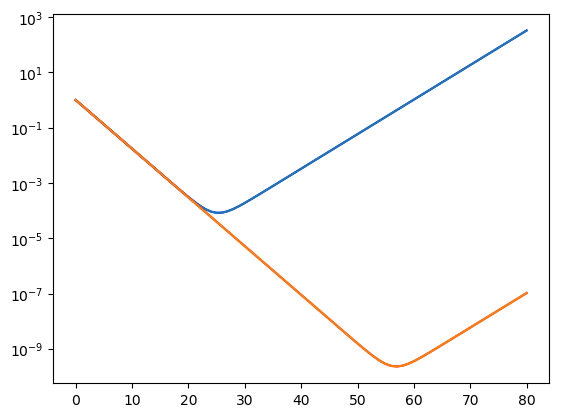

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x132978650>

In [30]:
using PyPlot

plot(a, color="blue")
semilogy(a)
plot(b, color="red")
semilogy(b)

In [33]:
n=80
c = Array{BigFloat}(n+1)
c[1] = 1
c[2] = 2/3

for i in 2:n
    c[i+1] = 2*c[i] - (8/9)*c[i-1]
end


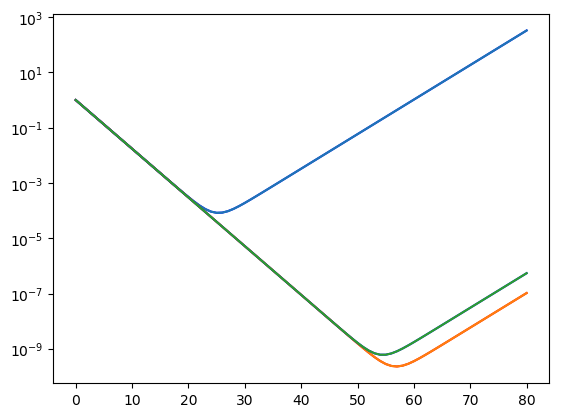

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x132c7a450>

In [34]:

plot(a, color="blue")
semilogy(a)
plot(b, color="red")
semilogy(b)
plot(c,color="blue")
semilogy(c)

## Question 2: Computational complexity of the mergesort algorithm

Consider two arrays of integers, A and B, having lengths n and m respectively. Assuming that the elements of A and B are already sorted in ascending order. The following recursive function merges them to return an array of length n+m whose elements are sorted in ascending order:



In [35]:
function mergepresorted(A::Array{Int64,1}, B::Array{Int64,1})
    if length(A) == 0
        return B
    elseif length(B) == 0
        return A
    elseif A[1] < B[1]
        return vcat([A[1]], mergepresorted(A[2:end], B))
    else
        return vcat([B[1]], mergepresorted(A, B[2:end]))
    end    
end

mergepresorted (generic function with 1 method)

The computational complexity of this function is $n+m$.

1. Verify that the function mergepresorted(A, B) works as described.
2. Write a recursive function that implements the mergesort algorithm for an array of integers whose length, $n$ is a power of 2: $n=2^m$. Verify that it works by generating some arrays of random integers and using your function to sort them.
3. Explain why the computational complexity, $F(n)$, of your mergesort algorithm satisfies the recursion
> $F(n) = 2\, F(\frac{n}{2}) + n\ \ \ \ $ with initial condition $F(1)=1$.  
4. Introduce the new variable p defined by $n = 2^p$ and let $b_p = F(2^p)$. Show that in these variables the above equation takes the form
> $b_p = 2 b_{p−1} + 2^p\ \ \ \ $ with initial condition $b_0 = 1$.
5. Find the general solution to the associated homogeneous recursion relation (ie without the $2^p$ term).
6. Find a particular solution of the original inhomogenous recursion relation and use the initial condition to determine the constant in the homogenous solution.
7. Hence show that the computational complexity of the mergesort algorithm is
> $F(n) = O(n\, \log n)$.
8. Use Julia's @timed macro to measure the execution time of your mergesort function for arrays of lengths $\{2^i : i =1 : 15\}$. Compare the results to the theoretical expectations.

In [2]:
function mergepresorted(A::Array{Int64,1}, B::Array{Int64,1})
    if length(A) == 0
        return B
    elseif length(B) == 0
        return A
    elseif A[1] < B[1]
        return vcat([A[1]], mergepresorted(A[2:end], B))
    else
        return vcat([B[1]], mergepresorted(A, B[2:end]))
    end    
end

mergepresorted (generic function with 1 method)

In [3]:
function mergeSort(A::Array{Int64,1})
    n = length(A)
    if n == 1
        return A
    else
        m = div(n/2)
        return mergepresorted(mergeSort(A[1:m]), mergeSort(A[m+1:n]))
    end
end
println(mergeSort([1,4,2,3,5,6]))

LoadError: [91mMethodError: no method matching div(::Float64)[0m
Closest candidates are:
  div(::Union{Float16, Float32, Float64}, [91m::BigFloat[39m) at mpfr.jl:428
  div(::T<:Real, [91m::T<:Real[39m) where T<:Real at operators.jl:566
  div(::Real, [91m::Real[39m) at promotion.jl:294
  ...[39m

In [67]:
x=rand(1:(2^2),2)
@time(mergeSort(x))

LoadError: [91mArgumentError: invalid index: 1.0[39m

In [52]:
function mergesort!(x::AbstractArray)

  if length(x) > 1
    mid    = div(length(x), 2)
    left   = mergesort!(x[1:mid])
    right  = mergesort!(x[mid+1:length(x)])
    result = Array(eltype(left), length(left) + length(right))

    left_ind = 1
    right_ind = 1
    r_ind = 1
    while left_ind<=length(left) && right_ind<=length(right)
        if left[left_ind]<right[right_ind]
            result[r_ind]=left[left_ind]
            left_ind += 1
        else
            result[r_ind]=right[right_ind]
            right_ind += 1
        end
        r_ind += 1
    end
    if left_ind<=length(left)
        result[r_ind:end] = left[left_ind:end]
    elseif right_ind<=length(right)
        result[r_ind:end] = right[right_ind:end]
    end
    result
  end
end

mergesort! (generic function with 1 method)